# Sklearn


The most commonly used package for machine learning in Python is undoubtedly Sklearn, so let's see how to do a linear regression here.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
data = pd.read_csv("Advertising.csv")

In [8]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
X = data[['TV', 'Radio', 'Newspaper']].values

In [10]:
y = data['Sales'].values

In [11]:
model = LinearRegression()

In [12]:
model.fit(X, y)

LinearRegression()

In [8]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [9]:
model.intercept_

2.9388893694594085

In [13]:
model.score(X, y)

0.8972106381789521

In [14]:
model.predict(X)

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

## Feature Selection

Feature selection is one of the first and important steps while performing any machine learning task. If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out). This gives rise to the need of doing feature selection.


Feature selection can be done in multiple ways but there are broadly 3 categories of it:

1. Filter Method
2. Wrapper Method

In [15]:
from sklearn.datasets import load_boston

In [16]:
boston = load_boston()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [17]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [22]:
data = pd.DataFrame(boston['data'], columns = boston['feature_names'])
data["MEDV"] = boston['target']
X = data.drop("MEDV",1)   #Feature Matrix
y = data["MEDV"]          #Target Variable
data.head()

C:\Users\JarvisII\AppData\Local\Temp/ipykernel_8520/494754596.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop("MEDV",1)   #Feature Matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Filter Method

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

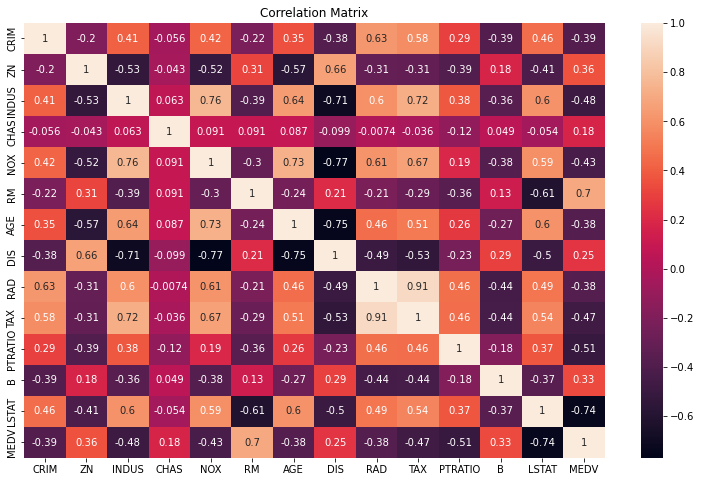

In [23]:
fig, ax = plt.subplots(figsize = (13, 8))

corr = data.corr()

ax = sns.heatmap(data.corr(), annot = True)
ax.set_title('Correlation Matrix');

In [24]:
corr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [25]:
corr_target = corr['MEDV']

mask = abs(corr_target) > 0.5

In [28]:
relevant_features = corr_target[mask]

In [29]:
relevant_features

RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [30]:
X = data.loc[:, ['RM', 'PTRATIO', 'LSTAT']]

In [31]:
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


**Don't forget Multicollinearity**

In [32]:
def vif(X):
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    return vif_data

In [33]:
vif(X)

,feature,VIF
0,RM,36.068093
1,PTRATIO,51.797351
2,LSTAT,5.855408


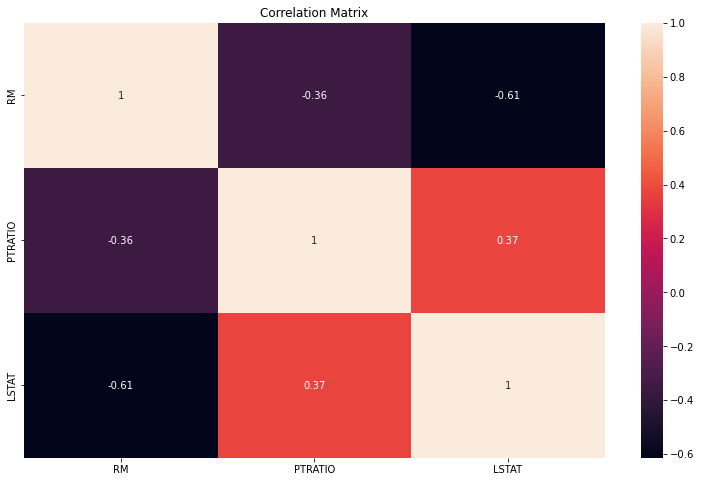

In [34]:
fig, ax = plt.subplots(figsize = (13, 8))

ax = sns.heatmap(X.corr(), annot = True)
ax.set_title('Correlation Matrix');

In [35]:
X.drop('RM', axis = 1, inplace = True)

In [36]:
vif(X)

,feature,VIF
0,PTRATIO,4.672133
1,LSTAT,4.672133


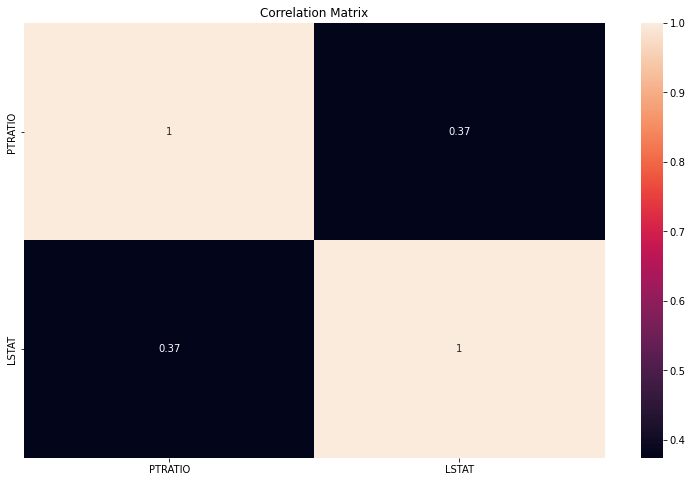

In [37]:
fig, ax = plt.subplots(figsize = (13, 8))

ax = sns.heatmap(X.corr(), annot = True)
ax.set_title('Correlation Matrix');

In [38]:
model = LinearRegression()

In [39]:
model.fit(X, y)

LinearRegression()

In [40]:
model.score(X, y)

0.6066546153493116

## Wrapper Method:


A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

#### Backward Elimination

As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [41]:
X = data.drop('MEDV', axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
X.shape

(506, 13)

In [43]:
X_1 = sm.add_constant(X)

In [38]:
X_1

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [39]:
model = sm.OLS(y, X_1).fit()

In [40]:
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        13:39:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see that the variable `AGE` has highest pvalue of 0.958 which is greater than 0.05. Hence we will remove this feature and build the model once again. 

In [42]:
#Backward Elimination
cols = list(X.columns)


while (len(cols) > 0):
    p = []
    
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    
    model = sm.OLS(y, X_1).fit()
    
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    
    pmax = max(p)
    
    feature_with_p_max = p.idxmax()
    
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    
    else:
        break

In [43]:
selected_features_BE = cols

In [44]:
selected_features_BE

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [45]:
len(selected_features_BE)

11

In [52]:
X = X.loc[:, selected_features_BE]

In [53]:
model = LinearRegression()

In [54]:
model.fit(X, y)

LinearRegression()

In [55]:
model.score(X, y)

0.7405822802569575

In [56]:
model.coef_

array([-1.08413345e-01,  4.58449292e-02,  2.71871630e+00, -1.73760234e+01,
        3.80157884e+00, -1.49271146e+00,  2.99608454e-01, -1.17779735e-02,
       -9.46524570e-01,  9.29084477e-03, -5.22553457e-01])

#### RFE (Recursive Feature Elimination)

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [57]:
from sklearn.feature_selection import RFE

In [58]:
model = LinearRegression()

In [59]:
rfe = RFE(model, n_features_to_select = 7)

In [60]:
X_rfe = rfe.fit_transform(X, y)

In [61]:
X_rfe

array([[ 0.   ,  0.538,  6.575, ...,  1.   , 15.3  ,  4.98 ],
       [ 0.   ,  0.469,  6.421, ...,  2.   , 17.8  ,  9.14 ],
       [ 0.   ,  0.469,  7.185, ...,  2.   , 17.8  ,  4.03 ],
       ...,
       [ 0.   ,  0.573,  6.976, ...,  1.   , 21.   ,  5.64 ],
       [ 0.   ,  0.573,  6.794, ...,  1.   , 21.   ,  6.48 ],
       [ 0.   ,  0.573,  6.03 , ...,  1.   , 21.   ,  7.88 ]])

In [62]:
X_rfe.shape

(506, 7)

In [63]:
model.fit(X_rfe, y)

LinearRegression()

In [64]:
model.score(X_rfe, y)

0.7171450343413888

In [65]:
rfe.support_

array([False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True])

In [66]:
rfe.ranking_

array([2, 3, 1, 1, 1, 1, 1, 4, 1, 5, 1])

In [67]:
a = np.random.randint(1, 100, 70)

In [70]:
a = a.reshape((10, 7))

In [71]:
a

array([[52, 12, 95, 26, 31, 26, 77],
       [24, 16, 92, 53, 17, 34, 52],
       [80, 14, 64, 48, 90, 56, 81],
       [61, 80, 56, 72, 32, 28, 21],
       [72, 86,  1, 57, 97, 18, 80],
       [89, 65, 62, 66, 11, 31,  7],
       [32, 82, 64, 99, 46,  5, 16],
       [ 9, 61, 51, 57, 72, 79, 59],
       [71, 41, 89, 30, 92, 85, 93],
       [46, 89, 95, 93, 24, 82, 76]])

In [74]:
model.predict(a)

array([  235.52543208,    21.77084332,   104.37454132, -1342.33024323,
       -1654.17079051,  -901.00217732, -1449.77593703, -1190.98579582,
        -410.37040131, -1540.43145424])

Here we took LinearRegression model with 7 features and RFE gave feature ranking as above, but the selection of number ‘7’ was random. Now we need to find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to 13. We then take the one for which the accuracy is highest.

In [76]:
X = data.drop('MEDV', axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [77]:
X.shape

(506, 13)

In [78]:
nof = 0           
score_list =[]

for n in range(1, 14):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select = n)
    
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    
    score_list.append(score)
    
    if(score == max(score_list)):
        nof = n

In [79]:
nof

11

In [80]:
score_list[10]

0.6369666437456358

In [81]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select = 11)

In [82]:
X_rfe = rfe.fit_transform(X, y)

In [83]:
model.fit(X_rfe, y)

LinearRegression()

In [84]:
model.score(X_rfe, y)

0.7342674984601645

In [85]:
temp = pd.Series(rfe.support_, index = X.columns)
temp

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX         True
RM          True
AGE        False
DIS         True
RAD         True
TAX         True
PTRATIO     True
B          False
LSTAT       True
dtype: bool

In [86]:
selected_features_rfe = temp[temp == True].index

In [87]:
selected_features_rfe

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

# Categorical Variables

So far our model has the following form, but this assumes that all variables take numerical values.

$$y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n$$


But if one of the variables $x_k$ is categorical we need to define a dummy variable.


$$
x_k
=
\left\{
\begin{matrix}
1 & \text{male}\\
0 & \text{female}\\
\end{matrix}
\right.
$$

An this way we have two models:

$$
\left\{
\begin{matrix}
y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_k + w_n x_n\\
y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n\\
\end{matrix}
\right.
$$

In [88]:
data = pd.read_csv('Ecom Expense.csv')

In [89]:
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    2362 non-null   object 
 1   Age               2362 non-null   int64  
 2    Items            2362 non-null   int64  
 3   Monthly Income    2362 non-null   int64  
 4   Transaction Time  2362 non-null   float64
 5   Record            2362 non-null   int64  
 6   Gender            2362 non-null   object 
 7   City Tier         2362 non-null   object 
 8   Total Spend       2362 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 166.2+ KB


In [91]:
data.columns = data.columns.str.strip()

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    2362 non-null   object 
 1   Age               2362 non-null   int64  
 2   Items             2362 non-null   int64  
 3   Monthly Income    2362 non-null   int64  
 4   Transaction Time  2362 non-null   float64
 5   Record            2362 non-null   int64  
 6   Gender            2362 non-null   object 
 7   City Tier         2362 non-null   object 
 8   Total Spend       2362 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 166.2+ KB


In [99]:
dummy_gender = pd.get_dummies(data['Gender'], prefix = 'Gender')
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix = 'City')

In [100]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [101]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [102]:
column_names = data.columns.values.tolist()
column_names

['Transaction ID',
 'Age',
 'Items',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [103]:
data_new = data.join(dummy_gender)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [104]:
data_new = data_new.join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [105]:
feature_columns = ['Monthly Income', 'Transaction Time', 'Record']
feature_columns += dummy_gender.columns.values.tolist()
feature_columns += dummy_city_tier.columns.values.tolist()
feature_columns

['Monthly Income',
 'Transaction Time',
 'Record',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [106]:
X = data_new[feature_columns]
y = data_new['Total Spend']

In [107]:
model = LinearRegression()

In [108]:
model.fit(X, y)

LinearRegression()

In [109]:
model.score(X, y)

0.9179923586131016

In [110]:
model.intercept_

-79.41713030136998

In [111]:
model.coef_

array([ 1.47538980e-01,  1.54946125e-01,  7.72233446e+02, -1.31025013e+02,
        1.31025013e+02,  7.67643260e+01,  5.51389743e+01, -1.31903300e+02])

In [112]:
zip1 = zip(feature_columns, model.coef_)
for v, c in zip1:
    print('Variable {:20} → {}'.format(v, c))

Variable Monthly Income       → 0.14753898049205733
Variable Transaction Time     → 0.15494612549589526
Variable Record               → 772.2334457445644
Variable Gender_Female        → -131.02501325554655
Variable Gender_Male          → 131.02501325554653
Variable City_Tier 1          → 76.76432601049524
Variable City_Tier 2          → 55.13897430923247
Variable City_Tier 3          → -131.90330031972766


In [113]:
76.76432601049524 + 55.13897430923247

131.9033003197277

## Redundant Dummy Variables

We can always mask 1 dummy variable

In [114]:
data = pd.read_csv('Ecom Expense.csv')

In [115]:
dummy_gender = pd.get_dummies(data['Gender'], prefix = 'Gender', drop_first = True)
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix = 'City', drop_first = True)

In [116]:
dummy_gender

,Gender_Male
0,0
1,0
2,1
3,0
4,0
...,...
2357,1
2358,1
2359,0
2360,0


In [117]:
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


now we need to join our data sets again 

## Exercise

Make a function that receives a dataframe and a list with the name of the variables that we want to convert into dummies and that returns a new dataframe with the new columns.

**add to your helper functions module**

In [118]:
def dummies_variables(data, dummies, prefix, drop_first = True):
    
    dum = [pd.get_dummies(data[d], prefix = p, drop_first = drop_first) for d, p in zip(dummies, prefix)]
    
    
    data_new = data.copy()
    
    for d in dum:
        data_new = data_new.join(d)
        
    return data_new

In [119]:
data_new = dummies_variables(data, ['Gender', 'City Tier'], ['Gender', 'City'])

In [120]:
data_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,1,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,1,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,0,0,0


In [121]:
feature_columns2 = ['Monthly Income', 'Transaction Time', 'Record']
feature_columns2 += dummy_gender.columns.values.tolist()
feature_columns2 += dummy_city_tier.columns.values.tolist()
feature_columns2

['Monthly Income',
 'Transaction Time',
 'Record',
 'Gender_Male',
 'City_Tier 2',
 'City_Tier 3']

In [122]:
X = data_new[feature_columns2]
y = data_new['Total Spend']

In [123]:
model2 = LinearRegression()

In [124]:
model2.fit(X, y)

LinearRegression()

In [125]:
model2.score(X, y)

0.9179923586131016

In [128]:
model2.intercept_

-133.67781754641874

In [129]:
model2.coef_

array([ 1.47538980e-01,  1.54946125e-01,  7.72233446e+02,  2.62050027e+02,
       -2.16253517e+01, -2.08667626e+02])

In [130]:
for v, c in zip(feature_columns, model.coef_):
    print('Variable {:20} → {}'.format(v, c))

Variable Monthly Income       → 0.14753898049205733
Variable Transaction Time     → 0.15494612549589526
Variable Record               → 772.2334457445644
Variable Gender_Female        → -131.02501325554655
Variable Gender_Male          → 131.02501325554653
Variable City_Tier 1          → 76.76432601049524
Variable City_Tier 2          → 55.13897430923247
Variable City_Tier 3          → -131.90330031972766


In [131]:
for v, c in zip(feature_columns2, model2.coef_):
    print('Variable {:20} → {}'.format(v, c))

Variable Monthly Income       → 0.14753898049205735
Variable Transaction Time     → 0.15494612549589615
Variable Record               → 772.2334457445636
Variable Gender_Male          → 262.05002651109305
Variable City_Tier 2          → -21.62535170126262
Variable City_Tier 3          → -208.66762633022302


## Regression Error Metrics



The $R^2$ coefficient is not the only metric that can help us evaluate how well our model works, there are more metrics that summarize in a single number how well our model predicts.


### Mean absolute error

The mean absolute error ($MAE$) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

$$MAE = \frac{1}{n} \sum |y - \hat{y}|$$


A small $MAE$ suggests the model is great at prediction, while a large $MAE$ suggests that your model may have trouble in certain areas. A $MAE$ of 0 means that your model is a perfect predictor of the outputs.

- Depending on how you want your model to treat **outliers**, or extreme values, in your data, you may want to bring more attention to these outliers or downplay them. The issue of outliers can play a major role in which error metric you use.

In [132]:
from sklearn import metrics

In [133]:
predictions = model2.predict(X)

In [134]:
print('MAE:', metrics.mean_absolute_error(y, predictions))

MAE: 682.4663893251284


In [135]:
y

0       4198.385084
1       4134.976648
2       5166.614455
3       7784.447676
4       3254.160485
           ...     
2357    2909.619546
2358    7968.633136
2359    8816.406448
2360    7915.595856
2361    6832.401686
Name: Total Spend, Length: 2362, dtype: float64

### Mean square error

The mean square error ($MSE$) is just like the $MAE$, but squares the difference before summing them all instead of using the absolute value.

$$MSE = \frac{1}{n} \sum (y - \hat{y})^2$$


Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. We can only compare our model’s error metrics to those of a competing model. The effect of the square term in the MSE equation is most apparent with the presence of outliers in our data. While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. This ultimately means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE. Similarly, our model will be penalized more for making predictions that differ greatly from the corresponding actual value. This is to say that large differences between actual and predicted are punished more in MSE than in MAE.

#### The problem of outliers

Do we include the outliers in our model creation or do we ignore them? The answer to this question is dependent on the field of study. For example, I know that some video games achieve superstar status and thus have disproportionately higher earnings. Therefore, it would be foolish of me to ignore these outlier games because they represent a real phenomenon within the data set. I would want to use the MSE to ensure that my model takes these outliers into account more.

If I wanted to downplay their significance, I would use the $MAE$ since the outlier residuals won’t contribute as much to the total error as $MSE$. Ultimately, the choice between is $MSE$ and $MAE$ is application-specific and depends on how you want to treat large errors. Both are still viable error metrics, but will describe different nuances about the prediction errors of your model.

In [136]:
print('MSE:', metrics.mean_squared_error(y, predictions))

MSE: 642563.075927526
